# Homework-5: Sentence-level Sentiment Classification with PyTorch

In [2]:
import torch.nn as nn
import torch.optim as optim

from utils.tester import test
from utils.trainer import train
from model import SentimentClassifier

from torchtext.legacy import data
from torchtext.legacy import datasets
from torchtext.vocab import Vectors

## Hyper-Parameters

In [1]:
class Args:
    def __init__(self):
        self.batch_size = 64
        self.max_epoch = 10
        self.learning_rate = 0.001

class Config:
    def __init__(self):
        self.hidden_dim = 512
        self.num_layers = 2
        self.dropout = 0.2
        self.num_classes = 6

args = Args()
config = Config()

## Load SST Dataset and Create Vocabulary

In [3]:
from utils.preprocess import preprocess
TEXT, train_iter, val_iter, test_iter = preprocess(args)

>>> Created Sets -> 8544 Training - 1101 Validation - 2210 Test
>>> Created Vocabulary Dictionary
| # Words: 16581 --- Embedding Dim: 300 |
>>> Created Batch Iterators with size 64


## Train and Test the model

In [4]:
from utils.trainer import validate

In [5]:
# Bi-Directional LSTM model
model = SentimentClassifier(config, TEXT.vocab.vectors)
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent as optimizer
optimizer = optim.Adam(model.parameters(), lr=args.learning_rate)
# Training
loss_and_acc_dict = train(model, train_iter, val_iter, optimizer, criterion, args.max_epoch)
# Testing
test(model, test_iter)

  0%|          | 0/10 [00:00<?, ?it/s]
 Epoch 1 --> Training Loss: 1.3742145371081225 | Accuracy: 38.81085968017578%

 10%|█         | 1/10 [02:02<18:25, 122.82s/it]
 Validation Loss: 1.324595868587494 | Accuracy: 42.59763717651367%


 Epoch 2 --> Training Loss: 1.2569463306398534 | Accuracy: 44.47565460205078%

 20%|██        | 2/10 [04:01<16:12, 121.59s/it]
 Validation Loss: 1.3104832304848566 | Accuracy: 42.59763717651367%


 Epoch 3 --> Training Loss: 1.1962502171744163 | Accuracy: 47.261234283447266%

 30%|███       | 3/10 [05:58<14:02, 120.31s/it]
 Validation Loss: 1.342780609925588 | Accuracy: 42.59763717651367%


 Epoch 4 --> Training Loss: 1.133657375823206 | Accuracy: 50.84269714355469%

 40%|████      | 4/10 [07:56<11:57, 119.54s/it]
 Validation Loss: 1.2858704858356051 | Accuracy: 46.23069763183594%


 Epoch 5 --> Training Loss: 1.0536512434482574 | Accuracy: 54.36563491821289%

 50%|█████     | 5/10 [09:55<09:56, 119.31s/it]
 Validation Loss: 1.3946287367078993 | Accuracy:

## Plot the curves

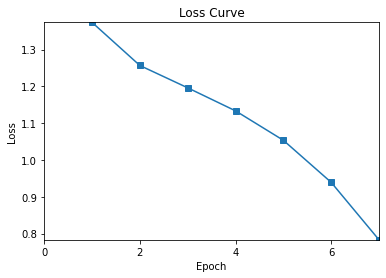

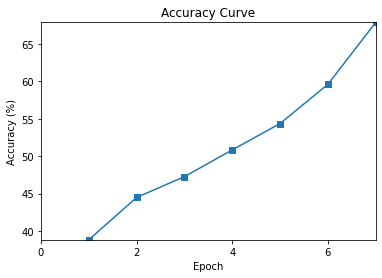

In [7]:
from utils.plot import plot_loss_and_acc
plot_loss_and_acc(loss_and_acc_dict)